In [1]:
#import necessary modules
import numpy as np
import pandas as pd

In [2]:

# set global parameters (perlude)
const_number_pages = 12

webpage_dict = {'A':['Anchovy','Grouper', 'Mackerel', 'Pike', 'Salmon', 'Betta', 'Walleye'],
               'B': ['Grouper', 'Pike', 'Wahoo', 'Tuna', 'Shad', 'Cod', 'Carp', 'Opah', 'Herring'],
               'C':['Anchovy', 'Wahoo', 'Tuna', 'Opah', 'Mudskipper'],
               'D':['Mackerel', 'Pike', 'Wahoo', 'Salmon', 'Mudskipper'],
               'E':['Anchovy', 'Grouper', 'Shad', 'Mudskipper', 'Herring', 'Walleye'],
               'F':['Grouper', 'Cod', 'Betta', 'Carp', 'Perch', 'Mudskipper'],
               'G':['Mackerel', 'Tuna', 'Shad', 'Cod', 'Opah', 'Walleye'],
               'H':['Anchovy', 'Mackerel', 'Pike', 'Salmon', 'Perch', 'Herring'],
               'I':['Pike', 'Tuna', 'Cod', 'Salmon', 'Carp', 'Walleye'],
               'J':['Grouper', 'Mackerel', 'Tuna', 'Perch', 'Walleye'],
               'K':['Mackerel', 'Wahoo', 'Shad', 'Betta', 'Carp', 'Opah', 'Herring'],
               'L':['Grouper', 'Wahoo', 'Betta', 'Perch', 'Mudskipper', 'Herring']}

out_edge_network = {'A':['C','E'],
               'B':['A','C'],
               'C':[],
               'D':['B'],
               'E':['C','F','G','I'],
               'F':['C', 'B','D','H'],
               'G':['F','I'],
               'H':['D','G','J'],
               'I':['G','J','K'],
               'J':['G','H','L'],
               'K':['J'],
               'L':['J']}



webpage_names = {
    "A": "Tim’s Wet Pets",
    "B": "Finny’s Fried Fish",
    "C": "By the Sea",
    "D": "Scales and Tails", 
    "E": "Fillets ’R Us", 
    "F": "It’s Better Wetter" ,
    "G": "Friendly Fish",  
    "H": "Frank’s Aquariums", 
    "I": "Fishmonger’s Bane", 
    "J": "Fish Eye Cafe", 
    "K": "Happy Fins", 
    "L": "Fishtastic" 
}

# pretty matrix print
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
def print_websites(ranking_vector: list) -> None:
    for i, j in enumerate(ranking_vector):
        try:
            print(f"{i+1}. {j}: {webpage_names[j]}")
        except KeyError:
            print("Wrong vector")
            return

In [3]:
# Actual start of programming
# 1) Create "raw" Google Matrix
# # convert adjancency matrix into google matrix
google = np.zeros(shape=(12,12))
for x in out_edge_network.keys():
    # we have to comment this, and do it later (this is what professor wants)
    # if len(out_edge_network[x]) == 0: 
        # for y in range(0,len(google[ord(x.lower()) - 97])):
            # google[ord(x.lower()) - 97][y] = 1/const_number_pages
    for y in out_edge_network[x]:
        google[ord(x.lower()) - 97][ord(y.lower()) - 97] = 1/len(out_edge_network[x])
print("1) Create 'Raw' Google Matrix: ")
matprint(google)

1) Create 'Raw' Google Matrix: 
  0     0   0.5         0  0.5     0         0         0     0         0         0         0  
0.5     0   0.5         0    0     0         0         0     0         0         0         0  
  0     0     0         0    0     0         0         0     0         0         0         0  
  0     1     0         0    0     0         0         0     0         0         0         0  
  0     0  0.25         0    0  0.25      0.25         0  0.25         0         0         0  
  0  0.25  0.25      0.25    0     0         0      0.25     0         0         0         0  
  0     0     0         0    0   0.5         0         0   0.5         0         0         0  
  0     0     0  0.333333    0     0  0.333333         0     0  0.333333         0         0  
  0     0     0         0    0     0  0.333333         0     0  0.333333  0.333333         0  
  0     0     0         0    0     0  0.333333  0.333333     0         0         0  0.333333  
  0     0     0   

In [4]:
# Check that rows are correct:

for i in google:
    tmp = i.sum()
    if tmp != 1.0 and tmp != 0.0:
        print("Not raw google matrix")

In [6]:
# decompose google matrix into components
eigenvalues, eigenvectors = np.linalg.eig(google)

In [16]:
print(eigenvalues[0])

(0.8911110824741333+0j)


In [17]:
print(eigenvectors[0])

[ 1.35656653e-01+0.j          1.50088574e-02+0.j
  8.81645637e-02+0.j         -4.01312429e-03-0.18953848j
 -4.01312429e-03+0.18953848j  1.71036030e-01-0.13793563j
  1.71036030e-01+0.13793563j -6.20655765e-02+0.j
  3.52761454e-03+0.j          3.73241764e-16+0.j
 -3.93932794e-16+0.j         -2.29391549e-01+0.j        ]


In [ ]:
# The largest eigenvalue is not exactly 1
# the egenvector corresponding to the largest eigenvalue does not have all negative or all positive entries

In [100]:
# 4) Fix dangling nodes
for i, j in enumerate(google):
    if not j.sum():
        google[i] = np.array([1/const_number_pages for k in range(const_number_pages)])
print("We will fix danling nodes, by adding artificial outlinks")
print("Updated Google Matrix: ")
matprint(google) 


We will fix danling nodes, by adding artificial outlinks
Updated Google Matrix: 
        0          0        0.5          0        0.5          0          0          0          0          0          0          0  
      0.5          0        0.5          0          0          0          0          0          0          0          0          0  
0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  
        0          1          0          0          0          0          0          0          0          0          0          0  
        0          0       0.25          0          0       0.25       0.25          0       0.25          0          0          0  
        0       0.25       0.25       0.25          0          0          0       0.25          0          0          0          0  
        0          0          0          0          0        0.5          0          0        0.5          0          0  

In [19]:
# eigvalues = np.linalg.eigvals(google)
# eigvalues
# print(f"Largest value: {eigvalues.max()}")
w, v = np.linalg.eig(np.transpose(google))

eigval = w.max()
eigvect = v[:, 0]
# print(f"Largest eigenvalue: {eigval}. ")
print(eigvect)
non_negative_count = 0

for i in eigvect:
    if i < 0:
        non_negative_count += 1
print(f"Number of negative entries in corresponding eigenvector: {non_negative_count}")
print("Since all of the entries are negative, we will flip their signs") # idk, I don't like it
eigvect = np.array([-i for i in eigvect])
print(eigvect)

[-0.16957809+0.j -0.28100694+0.j -0.34889546+0.j -0.1858699 +0.j
 -0.11386367+0.j -0.26424964+0.j -0.41341821+0.j -0.27219861+0.j
 -0.26424964+0.j -0.53118475+0.j -0.11715784+0.j -0.2061362 +0.j]
Number of negative entries in corresponding eigenvector: 12
Since all of the entries are negative, we will flip their signs
[0.16957809-0.j 0.28100694-0.j 0.34889546-0.j 0.1858699 -0.j
 0.11386367-0.j 0.26424964-0.j 0.41341821-0.j 0.27219861-0.j
 0.26424964-0.j 0.53118475-0.j 0.11715784-0.j 0.2061362 -0.j]


In [ ]:
# 6) Already normalized

In [109]:
# will be useful in the future meh, I am too dumb

def page_ranking_by_vector(vector: np.ndarray) -> list:
    sor = sorted(vector, reverse=True)
    result = []
    for i in sor:
        index = np.where(vector == i)[0]
        # if only one element:
        if index.size == 1:
          result.append(chr(index[0]+65))
        else:
            for j in index:
                tmp = chr(j+65)
                if tmp not in result:
                    result.append(tmp)
    return result


initial_page_ranking = page_ranking_by_vector(eigvect)
print("From eigenvector we obtain the following ranking:")
print_websites(initial_page_ranking)
            
     

        
    
    
        

From eigenvector we obtain the following ranking:
1. J: Fish Eye Cafe
2. G: Friendly Fish
3. C: By the Sea
4. B: Finny’s Fried Fish
5. H: Frank’s Aquariums
6. F: It’s Better Wetter
7. I: Fishmonger’s Bane
8. L: Fishtastic
9. D: Scales and Tails
10. A: Tim’s Wet Pets
11. K: Happy Fins
12. E: Fillets ’R Us


[0.05353167 0.08870703 0.11013779 0.05867459 0.03594398 0.08341716
 0.13050604 0.08592646 0.08341716 0.16768207 0.03698387 0.06507217]


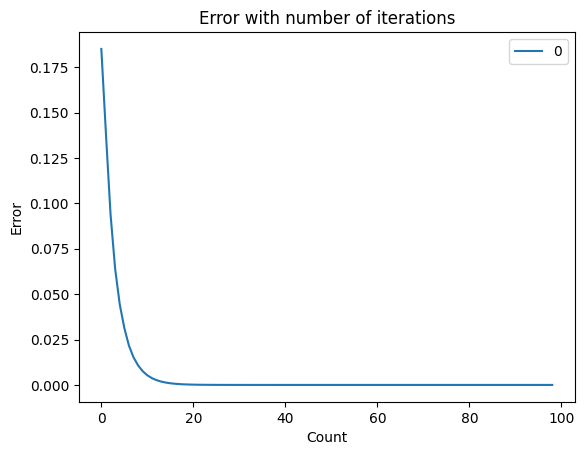

In [117]:
# 8)

# create our pi vector


def power_iteration(iteration_matrix, epsilon = np.finfo(float).eps, show_graph=False):
    pi = np.array([1/12 for i in range(const_number_pages)])
    count = 0
    # numpy machine epsilon
    diff = 1

    # error vector to make graph later (maybe)
    errors = []
    while(diff > epsilon):
        tmp = np.matmul(np.transpose(pi), iteration_matrix)
        tmp = np.transpose(tmp)
        diff = np.linalg.norm(tmp-pi)
        errors.append(diff)
        pi = tmp
        count += 1
        
    if show_graph:
        df = pd.DataFrame(errors)
        ax = df.plot(title="Error with number of iterations")
        ax.set_xlabel("Count")
        ax.set_ylabel("Error")
    return pi
        
pi = power_iteration(google, show_graph=True)
print(pi)
    
    



In [104]:
# now let's compare this vector with what we got before.
# they are the same
axax = page_ranking_by_vector(np.array(pi))
print("From eigenvector we obtain the following ranking:")
print_websites(axax)

From eigenvector we obtain the following ranking:
1. J: Fish Eye Cafe
2. G: Friendly Fish
3. C: By the Sea
4. B: Finny’s Fried Fish
5. H: Frank’s Aquariums
6. F: It’s Better Wetter
7. I: Fishmonger’s Bane
8. L: Fishtastic
9. D: Scales and Tails
10. A: Tim’s Wet Pets
11. K: Happy Fins
12. E: Fillets ’R Us


In [106]:
# 9)

alpha = 0.85
ones = (1-alpha)*(1/const_number_pages)*np.full((const_number_pages, const_number_pages), 1)
google_alpha = alpha * google + ones
matprint(google_alpha)

   0.0125     0.0125     0.4375     0.0125     0.4375     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125  
   0.4375     0.0125     0.4375     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125  
0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  0.0833333  
   0.0125     0.8625     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125     0.0125  
   0.0125     0.0125      0.225     0.0125     0.0125      0.225      0.225     0.0125      0.225     0.0125     0.0125     0.0125  
   0.0125      0.225      0.225      0.225     0.0125     0.0125     0.0125      0.225     0.0125     0.0125     0.0125     0.0125  
   0.0125     0.0125     0.0125     0.0125     0.0125     0.4375     0.0125     0.0125     0.4375     0.0125     0.0125     0.0125  
   0.0125     0.0125     0.0125   0.295833     0.0125     0.0125   0.

In [94]:
# 10)
# exactly the same output
new_eigenvect = power_iteration(google_alpha)
axax = page_ranking_by_vector(np.array(new_eigenvect))
print("From eigenvector we obtain the following ranking:")
print_websites(axax)

count=68
From eigenvector we obtain the following ranking:
1. Fish Eye Cafe
2. Friendly Fish
3. By the Sea
4. Finny’s Fried Fish
5. Frank’s Aquariums
6. It’s Better Wetter
7. Fishmonger’s Bane
8. Fishtastic
9. Scales and Tails
10. Tim’s Wet Pets
11. Fillets ’R Us
12. Happy Fins


In [ ]:
# 11) Yes, exactly the same